In [3]:
#%matplotlib notebook
import numpy             as np
import matplotlib.pyplot as plt
import corner
from tqdm import tqdm
import scipy.integrate as integrate
import matplotlib.animation as anim

In [7]:
def Prior(p):
    return np.piecewise(p, [p>=0 and p<=1,p<0 and p>1],[lambda p:1.,lambda p:0.])
Prior = np.vectorize(Prior)

In [9]:
Prior(2.0)

array(0.)

In [11]:
def Likelihood(p,r,n):
    return p**r*(1-p)**(n-r)

In [12]:
def Posterior(p,r,n):
    return Likelihood(p,r,n)*Prior(p)

In [23]:
p = np.linspace(0,1,1000)
r = 7
n = 10
Pos = Posterior(p,r,n)

In [24]:
I,_ = integrate.quad(Posterior,p[0],p[-1],args=(r,n))
I

0.0007575757575757576

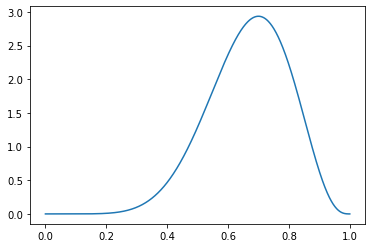

In [25]:
plt.plot(p,Pos/I)

In [26]:
index = np.where(np.amax(Pos)==Pos)
hatp = p[index][0]
hatp

0.6996996996996997

In [27]:
sigma = np.sqrt( hatp*(1-hatp)/n )
sigma

0.14495517580957562

In [33]:
def Metropolis(x0,Posterior,NSteps=int(1e4), delta=0.4):
    
    x = np.zeros((NSteps,1))
    x[0] = x0
    
    for i in tqdm(range(1,NSteps)):
        
        P0 = Posterior(x[i-1],r,n) # Present
        
        xf = x[i-1] + delta*2.*(np.random.rand()-0.5)
        
        P1 = Posterior(xf,r,n) # Future
        
        alpha = np.minimum(1,P1/P0)
        
        g = np.random.rand()
        
        if alpha > g:
            x[i] = xf
        else:
            x[i] = x[i-1]
            
            
    return x[100:,:]

In [34]:
initparams = np.array([0.2])
MCMC = Metropolis(initparams,Posterior)

100%|█████████████████████████████████████████████████████████| 9999/9999 [00:04<00:00, 2307.59it/s]


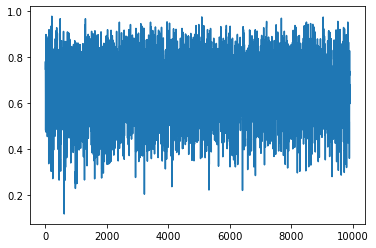

In [35]:
plt.plot(MCMC[:,0])

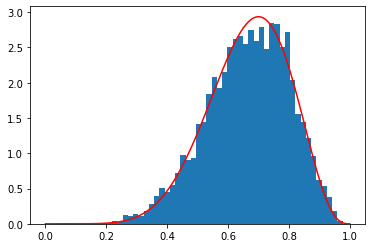

In [40]:
plt.hist(MCMC[:,0],bins=50,density=True);
plt.plot(p,Pos/I,color='r')